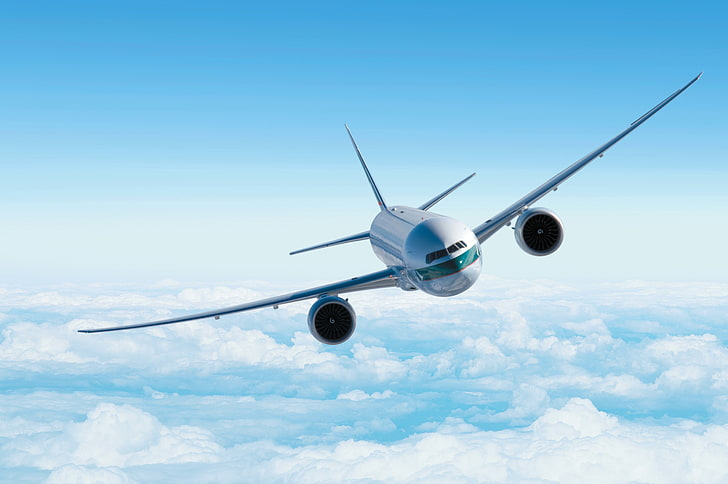

#**Import Libraries**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

# **Importing Data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI , ML/Clean_Dataset[1].csv")

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# **Data Informations**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
df.drop(columns = ["Unnamed: 0"] , inplace = True)

In [ ]:
df.shape

(300153, 11)

In [ ]:
df.duplicated().sum()

0

# **Plots**

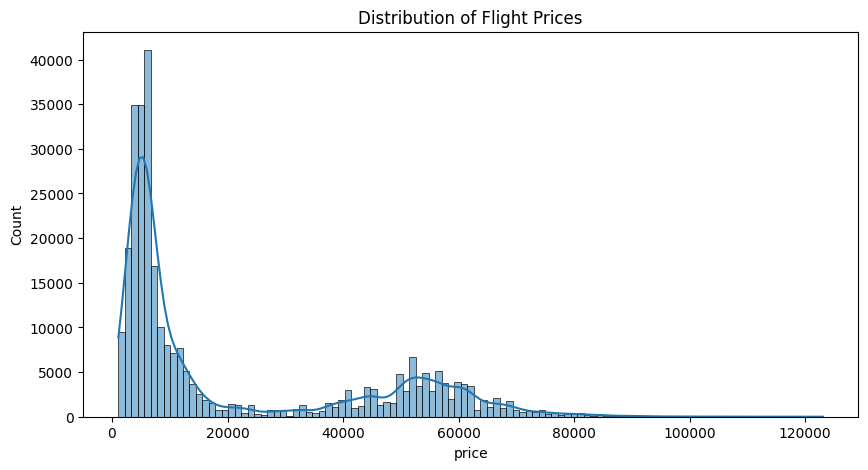

In [ ]:
plt.figure(figsize = (10 , 5))
plt.title("Distribution of Flight Prices")
sns.histplot(x = df["price"] , kde = True)
plt.show()

<Axes: ylabel='price'>

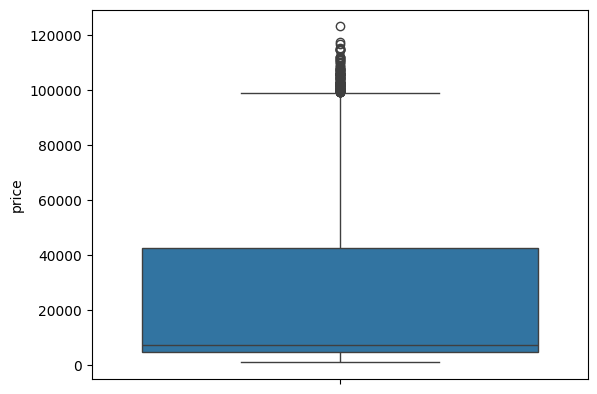

In [ ]:
sns.boxplot(df["price"])

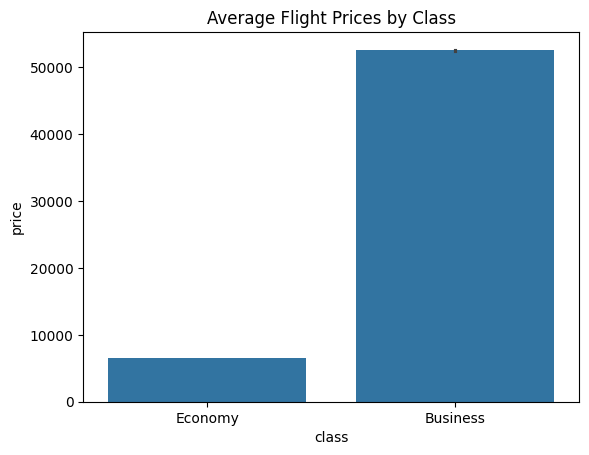

In [ ]:
sns.barplot(x = df["class"] , y = df["price"])
plt.title("Average Flight Prices by Class")
plt.show()

In [ ]:
blue_palette = sns.light_palette("blue", as_cmap=True)
blue_palette = sns.color_palette("Blues", n_colors=2)

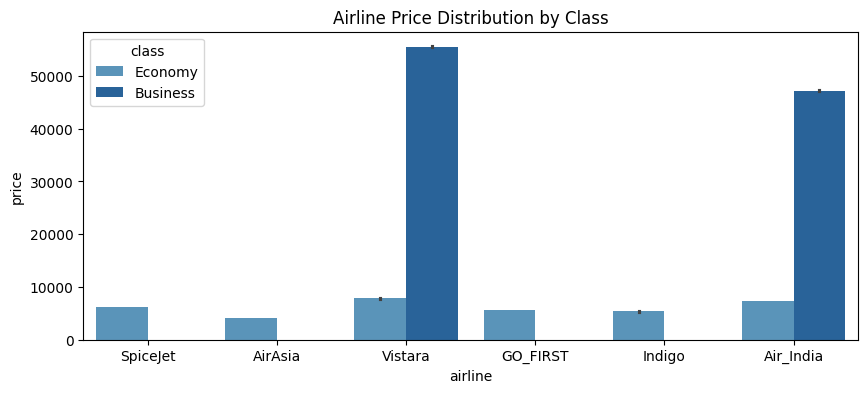

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df["airline"], y=df["price"], hue=df["class"] , palette=sns.color_palette("Blues", n_colors=4)[-2:])
plt.title("Airline Price Distribution by Class")
plt.show()

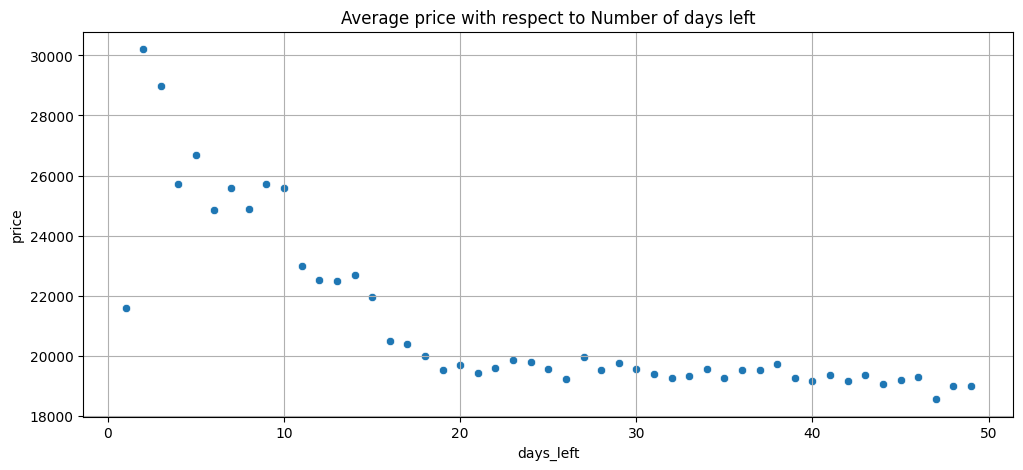

In [ ]:
plt.figure(figsize = (12 , 5))
plt.title("Average price with respect to Number of days left")
ax = sns.scatterplot(x = "days_left" , y = "price" , data = pd.DataFrame(df.groupby(["days_left"])["price"].mean()))
ax.grid(True)
ax.figure.show()

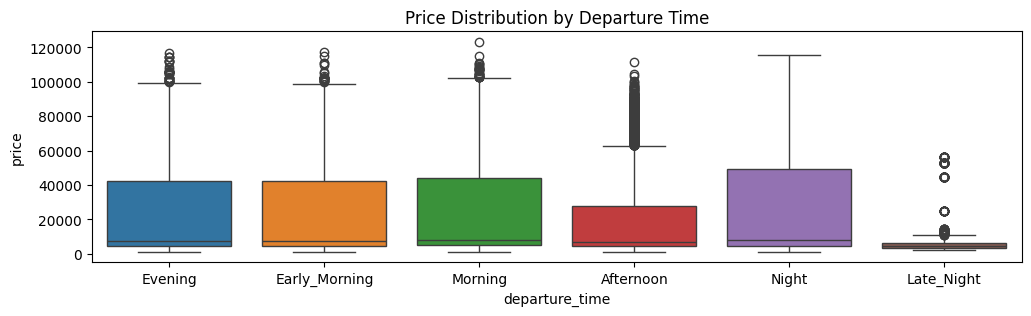

In [ ]:
plt.figure(figsize = (12 , 3))
plt.title("Price Distribution by Departure Time")
sns.boxplot(x = "departure_time" , y = "price" , data = df , hue = "departure_time")
plt.show()

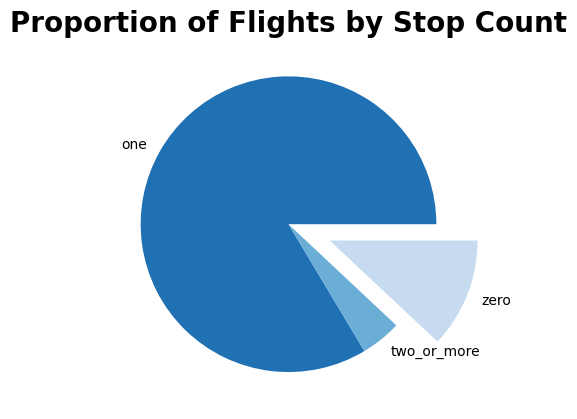

In [ ]:
plt.pie(df.groupby(["stops"])["stops"].count().values , labels = df.groupby(["stops"])["stops"].count().index , explode = (0 , 0 , 0.3) , colors=sns.color_palette("Blues", n_colors=3)[::-1])
plt.title("Proportion of Flights by Stop Count", fontsize=20, fontweight='bold')
plt.show()

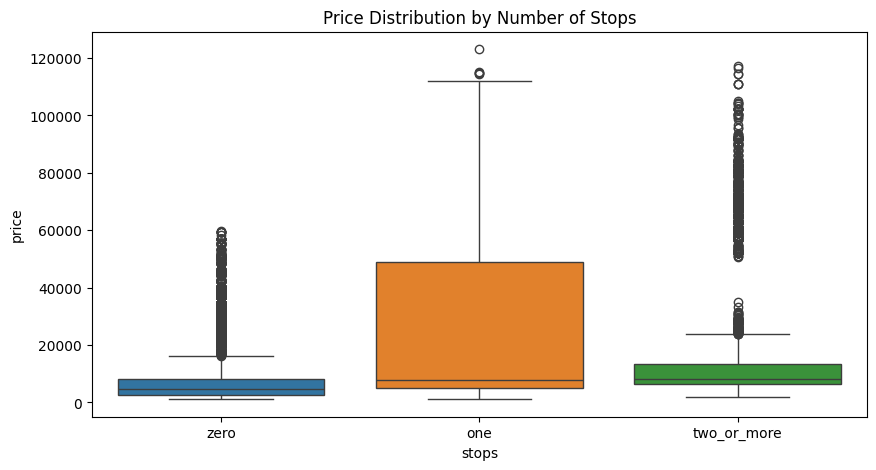

In [ ]:
plt.figure(figsize = (10 , 5))
plt.title("Price Distribution by Number of Stops")
sns.boxplot(x = "stops" , y = "price" , data = df , hue = "stops")
plt.show()

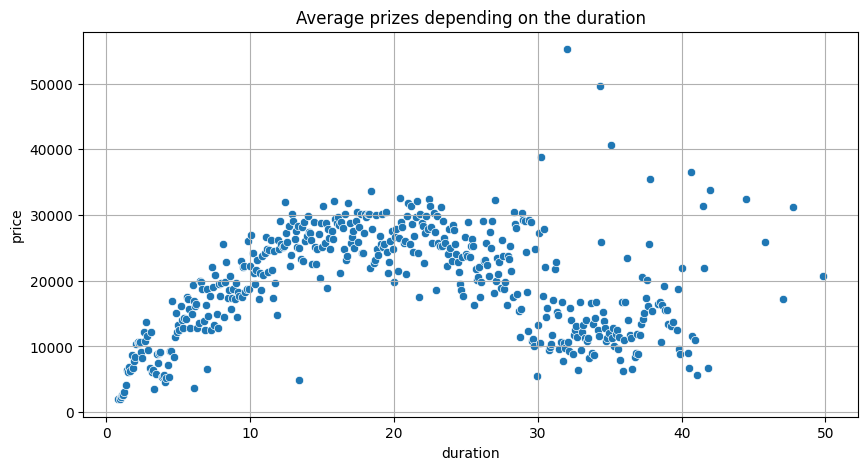

In [ ]:
plt.figure(figsize = (10 , 5))
ax = sns.scatterplot(x="duration", y="price", data = pd.DataFrame(df.groupby(["duration"])["price"].mean()))
ax.grid(True)
ax.figure.show()
plt.title("Average prizes depending on the duration")
plt.tight_layout
plt.show()

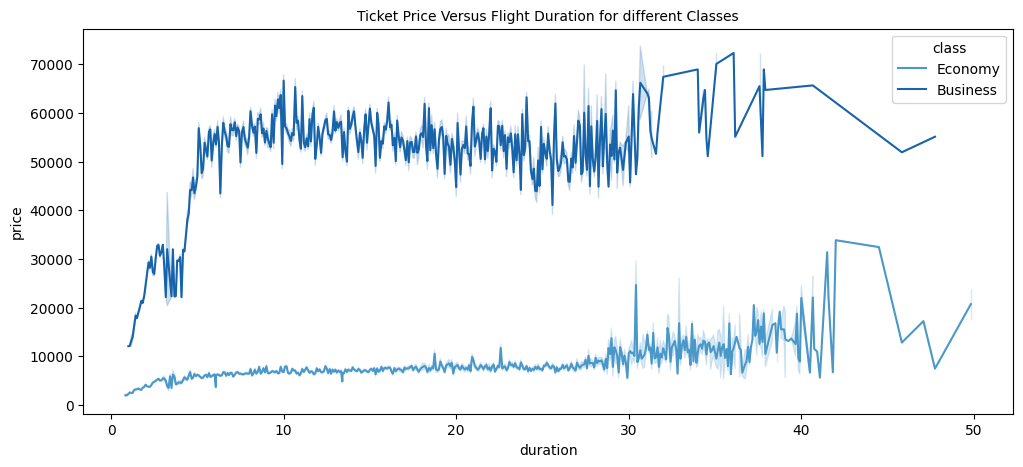

In [ ]:
plt.figure(figsize = (12 , 5))
plt.title('Ticket Price Versus Flight Duration for different Classes',fontsize=10)
sns.lineplot(x = df["duration"] , y = df["price"] , hue = df["class"] , palette=sns.color_palette("Blues", n_colors=4)[-2:])
plt.show()

In [ ]:
df[(df["source_city"] == "Delhi") & (df["destination_city"] == "Mumbai")]["price"].mean()

19355.82981228334

In [ ]:
sources = []
prices = []
dest = []

In [ ]:
for a in df["source_city"].unique():
  for b in df["destination_city"].unique():
    if a != b:
      sources.append(a)
      dest.append(b)
      prices.append(df[(df["source_city"] == a) & (df["destination_city"] == b)]["price"].mean())

In [ ]:
average_prices = pd.DataFrame({"source":sources , "destination":dest , "average_price":prices})

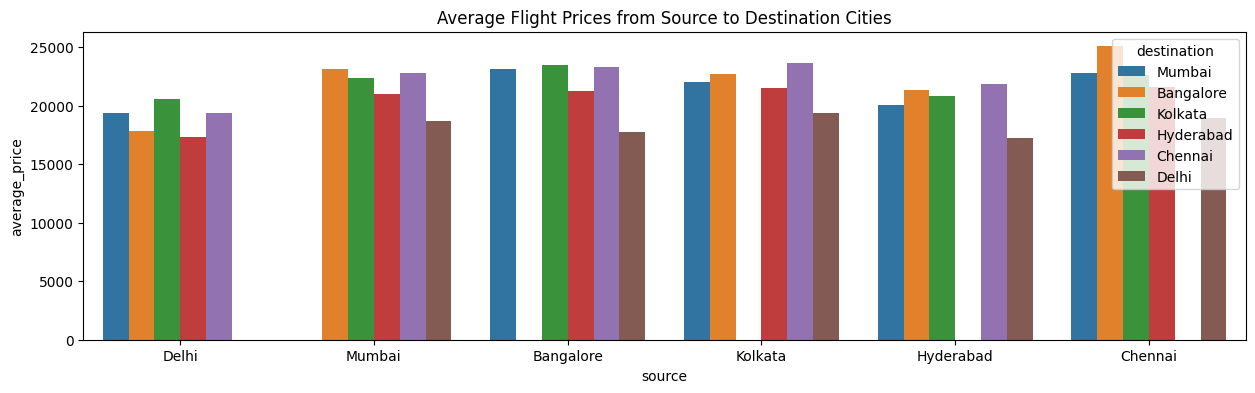

In [ ]:
plt.figure(figsize = (15 , 4))
sns.barplot(x = "source" , y = "average_price" , data = average_prices , hue = "destination")
plt.title('Average Flight Prices from Source to Destination Cities')
plt.show()

# **Preprocessing**

In [ ]:
df.drop(columns = ["flight"] , inplace = True)

In [ ]:
dict1 = {}

In [ ]:
for a in df.drop(columns = ["arrival_time" , "destination_city"]).columns:
  if df[a].dtype == "O":
    dict1[a] = LabelEncoder()
    dict1[a].fit(df[a])
    df[a] = dict1[a].transform(df[a])

In [ ]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,Night,Mumbai,1,2.17,1,5953
1,4,2,1,2,Morning,Mumbai,1,2.33,1,5953
2,0,2,1,2,Early_Morning,Mumbai,1,2.17,1,5956
3,5,2,4,2,Afternoon,Mumbai,1,2.25,1,5955
4,5,2,4,2,Morning,Mumbai,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,Evening,Hyderabad,0,10.08,49,69265
300149,5,1,0,0,Night,Hyderabad,0,10.42,49,77105
300150,5,1,1,0,Night,Hyderabad,0,13.83,49,79099
300151,5,1,1,0,Evening,Hyderabad,0,10.00,49,81585


In [ ]:
dict1

{'airline': LabelEncoder(),
 'source_city': LabelEncoder(),
 'departure_time': LabelEncoder(),
 'stops': LabelEncoder(),
 'class': LabelEncoder()}

In [ ]:
df["arrival_time"] = dict1["departure_time"].transform(df["arrival_time"])

In [ ]:
df["destination_city"] = dict1["source_city"].transform(df["destination_city"])

In [ ]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


In [ ]:
df.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,3.104873,2.577592,2.417337,0.284168,3.074086,2.588303,0.688536,12.221021,26.004751,20889.660523
std,1.833265,1.751762,1.754276,0.665825,1.741666,1.744543,0.463093,7.191997,13.561004,22697.767366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,6.830000,15.000000,4783.000000
50%,3.000000,2.000000,2.000000,0.000000,4.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,5.000000,4.000000,4.000000,0.000000,5.000000,4.000000,1.000000,16.170000,38.000000,42521.000000
max,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,1.000000,49.830000,49.000000,123071.000000


# **Correlations**

<Axes: >

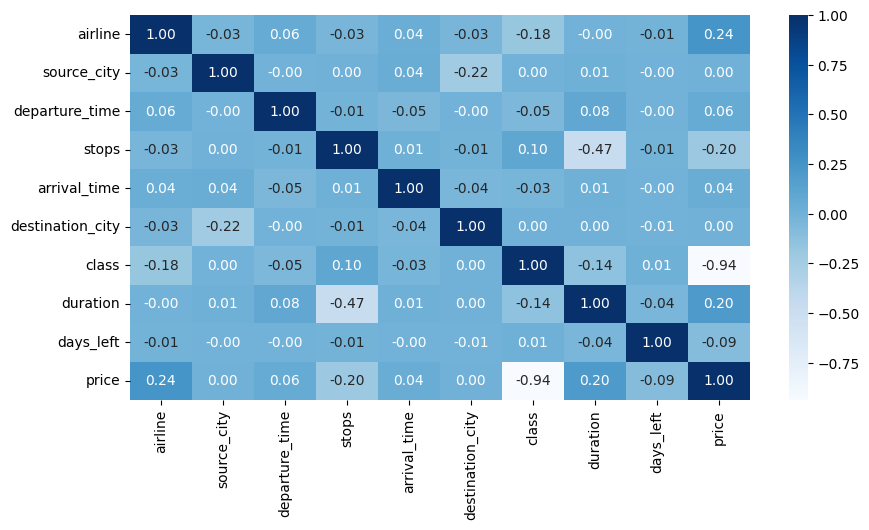

In [ ]:
plt.figure(figsize = (10 , 5))
sns.heatmap(df.corr() , annot = True , cmap="Blues" , fmt = "0.2f")

<Axes: >

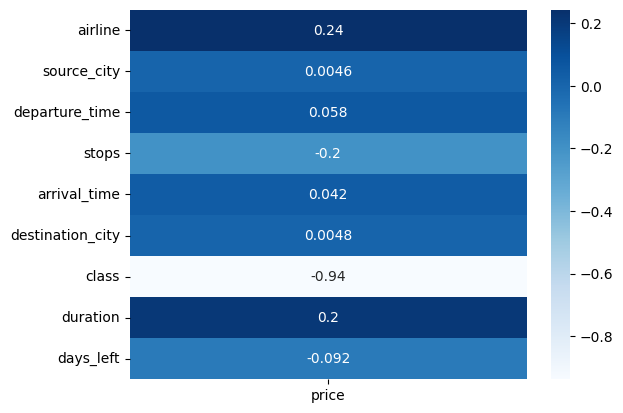

In [ ]:
sns.heatmap(pd.DataFrame(df.corr()["price"]).drop("price") , cmap = "Blues" , annot = True)

# **Define x ,y**

In [ ]:
x = df.drop(columns =["price"])

In [ ]:
y = df["price"]

In [ ]:
x

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49
300149,5,1,0,0,5,3,0,10.42,49
300150,5,1,1,0,5,3,0,13.83,49
300151,5,1,1,0,2,3,0,10.00,49


# **Normalization**

In [ ]:
minmax = MinMaxScaler()

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25)

In [ ]:
minmax.fit(x_train)

MinMaxScaler()

In [ ]:
x_train = minmax.transform(x_train)

In [ ]:
x_test = minmax.transform(x_test)

In [ ]:
x_temp = x

In [ ]:
x = minmax.transform(x)

In [ ]:
pd.DataFrame(x , columns = x_temp.columns).describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,0.620975,0.515518,0.483467,0.142084,0.614817,0.517661,0.688536,0.232470,0.520932
std,0.366653,0.350352,0.350855,0.332912,0.348333,0.348909,0.463093,0.146775,0.282521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.200000,0.000000,0.400000,0.200000,0.000000,0.122449,0.291667
50%,0.600000,0.400000,0.400000,0.000000,0.800000,0.600000,1.000000,0.212653,0.520833
75%,1.000000,0.800000,0.800000,0.000000,1.000000,0.800000,1.000000,0.313061,0.770833
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **MODELING**

In [ ]:
# Create a loop to find best test_size
test_list = []
mse_list = []
r2score_list = []
best_r2=0
best_mse=0
best_test=0

In [ ]:
# The variable tester is calculated as 0.025 times the loop index (which ranges from 6 to 18). This means that tester takes values from 0.15 to 0.45 (in increments of 0.025)

In [ ]:
for tester in range(6, 19) :
    tester = round(0.025 * tester, 2)
    test_list.append(tester)
    #
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=tester, random_state=0)
    #
    lr = LinearRegression().fit(x, y)
    y_pred_lr = lr.predict(x_test)
    r2score = r2_score(y_test, y_pred_lr)
    r2score_list.append(r2score)
    mse = mean_squared_error(y_test, y_pred_lr)
    mse_list.append(mse)
    #
    if r2score>best_r2 :
        best_r2 = r2score
        best_mse = mse
        best_test = tester

In [ ]:
print('Best test_size : {}'.format(best_test))
print('Best R2Score : {}'.format(best_r2))
print('Best Mean Squared Error : {}'.format(best_mse))

Best test_size : 0.15
Best R2Score : 0.9061340140294626
Best Mean Squared Error : 47967715.85856067


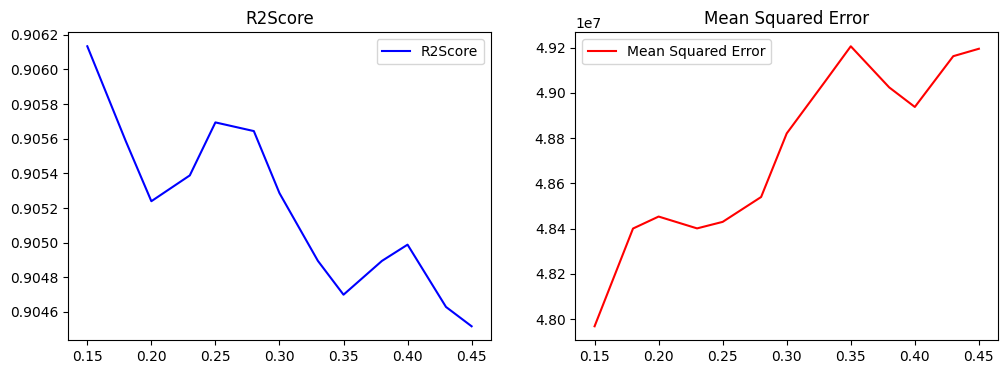

In [ ]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(test_list, r2score_list, c='blue', label='R2Score')
ax[0].set_title("R2Score")
ax[0].legend()

ax[1].plot(test_list, mse_list, c='red', label='Mean Squared Error')
ax[1].set_title("Mean Squared Error")
ax[1].legend()
plt.show()

In [ ]:
knn_reg = KNeighborsRegressor()
linear_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
tree_reg = DecisionTreeRegressor()
forest = RandomForestRegressor()
gradient = GradientBoostingRegressor()
xgb = XGBRegressor()
adaboost = AdaBoostRegressor()

In [ ]:
models = [knn_reg , linear_reg , ridge , lasso , tree_reg , forest , gradient , xgb , adaboost]

In [ ]:
for model in models:
  model.fit(x_train , y_train)
  y_pred = model.predict(x_test)
  print("Model Name: ", model)
  print("Mean Absolute Error MAE): " , mean_absolute_error(y_test , y_pred))
  print("Root Mean Squared Error (RMSE): " , mean_squared_error(y_test , y_pred))
  print("R2_score" , r2_score(y_test , y_pred))
  print("------------------------------------------------------------------------------------------------------------")

Model Name:  KNeighborsRegressor()
Mean Absolute Error MAE):  1991.6545336087486
Root Mean Squared Error (RMSE):  15729174.414522653
R2_score 0.9694711736139132
------------------------------------------------------------------------------------------------------------
Model Name:  LinearRegression()
Mean Absolute Error MAE):  4641.514393023144
Root Mean Squared Error (RMSE):  49203084.411757864
R2_score 0.9045015089743276
------------------------------------------------------------------------------------------------------------
Model Name:  Ridge()
Mean Absolute Error MAE):  4641.546754140967
Root Mean Squared Error (RMSE):  49203092.60690053
R2_score 0.9045014930683378
------------------------------------------------------------------------------------------------------------
Model Name:  Lasso()
Mean Absolute Error MAE):  4640.481808318957
Root Mean Squared Error (RMSE):  49203008.92977054
R2_score 0.9045016554776611
-----------------------------------------------------------------

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=tester, random_state=0)

rf = RandomForestRegressor().fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
rf_r2 = r2_score(y_test, y_pred_rf)
print("RandomForestRegressor R2Score =" , rf_r2)

RandomForestRegressor R2Score = 0.9845795950624515


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of decision trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required in a leaf node
}


regressor = RandomForestRegressor()

random_search = RandomizedSearchCV(regressor, param_distributions=param_grid, n_iter=10,
                                   cv=5, random_state=42)
random_search.fit(x_train, y_train)


best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best hyperparameters: {best_params}")
print(f"Test set Mean Squared Error: {mse:.4f}")
print(f"Test set R-squared score: {r2:.4f}")

Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30}
Test set Mean Squared Error: 7496527.2742
Test set R-squared score: 0.9854


In [ ]:
final_model = RandomForestRegressor(n_estimators=50 , min_samples_split=10 , min_samples_leaf=1 , max_depth=30)

In [ ]:
final_model.fit(x_train , y_train)

RandomForestRegressor(max_depth=30, min_samples_split=10, n_estimators=50)

In [ ]:
print(f"R-squared score: {r2_score(y_test , final_model.predict(x_test))}")
print(f"Mean squared error: {mean_squared_error(y_test , final_model.predict(x_test))}")
print(f"Mean absolute error: {mean_absolute_error(y_test , final_model.predict(x_test))}")

R-squared score: 0.9855165553071605
Mean squared error: 7462213.73909703
Mean absolute error: 1199.0995793154584


Serializing Model Components for Deployment: Saving Label Encoder, Trained Model, and Scaler with Pickle

In [ ]:
needed_files = {"label_encoder":dict1 , "model":final_model , "scaler":minmax}

In [ ]:
import pickle

In [ ]:
file = open("file_flight.pkl" , "wb")

In [ ]:
pickle.dump(needed_files , file)

In [ ]:
check = open("file_flight.pkl" , "rb")

<_io.BufferedReader name='file_flight.pkl'>

In [2]:
# !jupyter nbconvert --to html /content/regression_project_flight.ipynb